In [1]:
### conexiones
import sys
sys.path.insert(0, "/home/jupyter")

%time
import ciphered_connections as connections
import getpass
from datetime import datetime

# path = getpass.getpass("PATH: ")
# key = getpass.getpass("KEY:  ")
# iv = getpass.getpass("IV:   ")

path = "/home/jupyter/ciphered_connections/000543781.dta"
key = "50bb801fa81378a538654b2b7076b223"
iv = "9029080389AF47F5"

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


In [2]:
# path: /home/jupyter/ciphered_connections/000543781.dta  
# key: 50bb801fa81378a538654b2b7076b223
# iv: 9029080389AF47F5

%time

conexion_bq = connections.BigQueryConnection(
    path_token = path, key = key, 
    iv = iv)
datetime_str = datetime.now().strftime("%Y%m%d%H%M%S")
table = "DATAMART.gcs_tabla_tiger_{0}".format(datetime_str)
bucket_object = "gcs_file_tiger_{0}_*.csv".format(datetime_str)
bucket_name = 'nbamasmovil'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


In [3]:
# Descarga de tablón
query_decil = '''
    SELECT *                                  
    FROM  `bi-data-science-pilots.DESARROLLO.TABLON_1P_SEG_Comp_202006`
    where Decil < 3
        '''
TABLON_decil = conexion_bq.download_table_bq_gcs(query_decil,
    tabla_tmp = table, bucket_name = bucket_name,
    tmp_object = bucket_object)

TABLON_decil

Query results loaded to table /projects/bi-data-science-pilots/datasets/DATAMART/tables/gcs_tabla_tiger_20201103091817
Exported DATAMART.gcs_tabla_tiger_20201103091817 to gs://nbamasmovil/gcs_file_tiger_20201103091817_*.csv
Ejecutando la query:
 drop table `bi-data-science-pilots.DATAMART.gcs_tabla_tiger_20201103091817` ...

Query ejecutada correctamente


,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Mobile_Red_Incidences,Bundle_Type,Fecha_Predicion,Modelo,Decil,Percentil,Propension,VERSION,fuga_real,ISSUE_CALL
0,2020,6,202006,YOIGO,3091758,2011-06-07,2020-06-10,5,1,1,...,NaN,1P,2020-08-01,CHURN,2,16,0.509385,2,0,NaN
1,2020,6,202006,YOIGO,1732527,2010-02-25,2020-06-11,3,1,1,...,0.0,1P,2020-08-01,CHURN,2,12,0.529899,2,0,NaN
2,2020,6,202006,YOIGO,1397705,2009-09-30,2020-06-18,7,2,1,...,NaN,1P,2020-08-01,CHURN,2,19,0.498164,2,0,1.0
3,2020,6,202006,YOIGO,6307684,2014-09-25,2020-05-27,11,2,2,...,NaN,1P,2020-08-01,CHURN,2,20,0.494783,2,0,NaN
4,2020,6,202006,YOIGO,1900395,2010-04-24,2020-03-18,6,0,0,...,NaN,1P,2020-08-01,CHURN,2,18,0.502642,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63719,2020,6,202006,YOIGO,4910724,2013-01-21,2018-11-16,2,0,0,...,NaN,1P,2020-08-01,CHURN,2,13,0.523756,2,0,NaN
63720,2020,6,202006,YOIGO,7426666,2016-07-13,NaN,0,0,0,...,NaN,1P,2020-08-01,CHURN,1,3,0.665562,2,0,NaN
63721,2020,6,202006,YOIGO,5676421,2013-12-01,NaN,1,0,0,...,NaN,1P,2020-08-01,CHURN,2,14,0.518817,2,0,NaN
63722,2020,6,202006,YOIGO,6443203,2014-12-17,2018-07-05,3,0,0,...,NaN,1P,2020-08-01,CHURN,2,17,0.508022,2,0,NaN


In [4]:
df=TABLON_decil.copy()
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Mobile_Red_Incidences,Bundle_Type,Fecha_Predicion,Modelo,Decil,Percentil,Propension,VERSION,fuga_real,ISSUE_CALL
0,2020,6,202006,YOIGO,3091758,2011-06-07,2020-06-10,5,1,1,...,NaN,1P,2020-08-01,CHURN,2,16,0.509385,2,0,NaN
1,2020,6,202006,YOIGO,1732527,2010-02-25,2020-06-11,3,1,1,...,0.0,1P,2020-08-01,CHURN,2,12,0.529899,2,0,NaN
2,2020,6,202006,YOIGO,1397705,2009-09-30,2020-06-18,7,2,1,...,NaN,1P,2020-08-01,CHURN,2,19,0.498164,2,0,1.0
3,2020,6,202006,YOIGO,6307684,2014-09-25,2020-05-27,11,2,2,...,NaN,1P,2020-08-01,CHURN,2,20,0.494783,2,0,NaN
4,2020,6,202006,YOIGO,1900395,2010-04-24,2020-03-18,6,0,0,...,NaN,1P,2020-08-01,CHURN,2,18,0.502642,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63719,2020,6,202006,YOIGO,4910724,2013-01-21,2018-11-16,2,0,0,...,NaN,1P,2020-08-01,CHURN,2,13,0.523756,2,0,NaN
63720,2020,6,202006,YOIGO,7426666,2016-07-13,NaN,0,0,0,...,NaN,1P,2020-08-01,CHURN,1,3,0.665562,2,0,NaN
63721,2020,6,202006,YOIGO,5676421,2013-12-01,NaN,1,0,0,...,NaN,1P,2020-08-01,CHURN,2,14,0.518817,2,0,NaN
63722,2020,6,202006,YOIGO,6443203,2014-12-17,2018-07-05,3,0,0,...,NaN,1P,2020-08-01,CHURN,2,17,0.508022,2,0,NaN


In [5]:
# tratamiento de valores ausentes 

# Imputación de valores perdidos sobre el tablon con todos los registros

df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
df.isnull().values.any()

False

#### Depuración de tabla

In [6]:
import AYD
cadena=AYD.DS.DSC_Factor(df)
cadena_constantes = cadena[cadena.unique==1]           
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes

['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CONSENTSTATUSDETAIL',
 'CONSENTSTATUSNAME',
 'CONSENT_STATUS_DS',
 'CONSENT_STATUS_DETAIL',
 'CUST_PREP_SEGMENT',
 'MAIN_BRAND',
 'CRM_WORK_TYPE']

In [7]:
verificar('BRAND_DS')

NameError: name 'verificar' is not defined

In [8]:
cadena=AYD.DS.DSC_Factor(df)
cadena.head()

,Variables,TIPO,count,nº_NA,Pcte_NA,unique,top,freq
0,BRAND_DS,Factor,191059,0,0,1,YOIGO,191059
1,MIN_SERV_ACTIVATION_DATE,Factor,191059,0,0,4555,2014-02-03,521
2,MAX_SERV_DEACTIVATION_DATE,Factor,191059,0,0,3638,.,118489
3,CUST_BILL_PREP_SEGMENT_CURR,Factor,191059,0,0,3,.,183201
4,CUST_BILL_POST_SEGMENT_CURR,Factor,191059,0,0,1,RESI,191059


In [9]:
# Se identifican variables constantes
# ===================================================
cadena_constantes = cadena[cadena.unique==1]       
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ===================================================
# eliminar_constantes.extend(['CONSENTSTATUSDETAIL','CONSENTSTATUSNAME','CONSENT_STATUS_DS','CONSENT_STATUS_DETAIL'] ) # variables gdpr 
# eliminar_constantes.extend(['CUST_PREP_SEGMENT','MAIN_BRAND'] ) # variables desconocida
eliminar_constantes.extend(['CRM_WORK_TYPE'] ) # WORK TYPE, tenemos que recodificar bien
eliminar_constantes


['BRAND_DS',
 'CUST_BILL_POST_SEGMENT_CURR',
 'CUST_BUNDLE_CURR',
 'Bundle_Type',
 'Fecha_Predicion',
 'Modelo',
 'CRM_WORK_TYPE']

In [10]:

# Se eliminan las varibales seleccionadas
# ========================================
df.drop(eliminar_constantes, axis = 'columns',inplace=True) 
df

,YEAR,MONTH,EOP,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,...,Incidencias_High_Priority,total_jiras_cc,Jiras_Reclamacion_Movil,Mobile_Red_Incidences,Decil,Percentil,Propension,VERSION,fuga_real,ISSUE_CALL
0,2020,6,202006,3091758,2011-06-07,2020-06-10,5,1,1,2,...,0.0,0.0,0.0,0.0,2,16,0.509385,2,0,0.0
1,2020,6,202006,1732527,2010-02-25,2020-06-11,3,1,1,1,...,0.0,1.0,0.0,0.0,2,12,0.529899,2,0,0.0
2,2020,6,202006,1397705,2009-09-30,2020-06-18,7,2,1,3,...,0.0,0.0,0.0,0.0,2,19,0.498164,2,0,1.0
3,2020,6,202006,6307684,2014-09-25,2020-05-27,11,2,2,3,...,0.0,0.0,0.0,0.0,2,20,0.494783,2,0,0.0
4,2020,6,202006,1900395,2010-04-24,2020-03-18,6,0,0,2,...,0.0,0.0,0.0,0.0,2,18,0.502642,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63719,2020,6,202006,4910724,2013-01-21,2018-11-16,2,0,0,1,...,0.0,0.0,0.0,0.0,2,13,0.523756,2,0,0.0
63720,2020,6,202006,7426666,2016-07-13,.,0,0,0,1,...,0.0,0.0,0.0,0.0,1,3,0.665562,2,0,0.0
63721,2020,6,202006,5676421,2013-12-01,.,1,0,0,1,...,0.0,0.0,0.0,0.0,2,14,0.518817,2,0,0.0
63722,2020,6,202006,6443203,2014-12-17,2018-07-05,3,0,0,1,...,0.0,0.0,0.0,0.0,2,17,0.508022,2,0,0.0


In [11]:
# Se eliminan las varibales seleccionadas
# ========================================
df.drop(['CRM_BIRTH_DT',
 'LINE_TYPE_MAIN_PREP_ACT_LAST_DT', 'LINE_TYPE_MAIN_PREP_DEA_LAST_DT',
 'LINE_TYPE_FIXE_POST_ACT_LAST_DT', 'LINE_TYPE_MAIN_POST_ACT_LAST_DT',
 'LINE_TYPE_EXTR_POST_ACT_LAST_DT', 'LINE_TYPE_ADDI_POST_ACT_LAST_DT',
 'LINE_TYPE_FIXE_POST_DEA_LAST_DT', 'LINE_TYPE_MAIN_POST_DEA_LAST_DT',
 'LINE_TYPE_EXTR_POST_DEA_LAST_DT', 'LINE_TYPE_ADDI_POST_DEA_LAST_DT',
 'CUSTOMER_ID'], axis = 'columns',inplace=True) 



numericas=AYD.DS.DSC(df)
numericas.head()


#eliminar todas la variables con la palabra busi y soho
eliminar=list(numericas[numericas['Variables'].str.contains("BUSI|SOHO|FIX|GDPR|FTTH|ADSL|2P|FMC|PRE" ,case=False)]['Variables']) 
eliminar.extend(['EOP','GDPR_NEVER_CALL','MONTH','Propension','YEAR','Percentil','VERSION','Decil'])  # variables gdpr 

df.drop(eliminar, axis = 'columns', inplace=True)
df_num=df
df_num

,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,...,IS_SAME_3M_AVG_THR_QOE_MOBI,IS_IMPROVED_3M_AVG_THR_QOE_MOBI,tiempo_hr_resolucion_reclamacion,tiempo_hr_resolucion_incidencia,Incidencias_High_Priority,total_jiras_cc,Jiras_Reclamacion_Movil,Mobile_Red_Incidences,fuga_real,ISSUE_CALL
0,2011-06-07,2020-06-10,5,1,1,2,11,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2010-02-25,2020-06-11,3,1,1,1,7,0,3,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
2,2009-09-30,2020-06-18,7,2,1,3,8,1,0,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
3,2014-09-25,2020-05-27,11,2,2,3,14,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2010-04-24,2020-03-18,6,0,0,2,8,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63719,2013-01-21,2018-11-16,2,0,0,1,2,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63720,2016-07-13,.,0,0,0,1,0,0,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63721,2013-12-01,.,1,0,0,1,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63722,2014-12-17,2018-07-05,3,0,0,1,3,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


#### Comprobamos existencia de variables concretas

In [13]:
import pandas as pd


In [14]:

def verificar(var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

verificar("fri")   

['NUM_CALL_FRID',
 'IVR_NUM_FRID',
 'NUM_FRIENDS',
 'FRIENDS_NUM_SECS_CURR',
 'NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_MAS',
 'NUM_FRIENDS_BRAND_PEP',
 'NUM_FRIENDS_BRAND_GMM',
 'FRIENDS_MAIN_BRAND',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_MAS',
 'FRIENDS_IS_CHURN_PEP',
 'FRIENDS_IS_CHURN_GMM']

In [18]:
#DF_muestra.isnull().values.any()

##### BLOQUE 2 COMPETITORS
Adaptamos la definicion de los segmentos de 3P a 1P. Tenemos variables que no existen para 1P y se procede a su creación guardando la maxima similitud.
Este segmento trata de problemas técnicos como de instalacion Latencia, Problemas con router, problemas tecnicos. En el caso de 1P podrían ser problemas relacionados con
el fallo en el terminar, problemas con el terminal.
##### DEFINICION Issue 3P 
<ol>
<li> IS_CHURN_GMM>0 OR </li>
<li> LLAMADAS_COMPENTENCIA>0 </li>
<li> PORTABILIDADES_PREVIAS>0  </li>
<li> NUM_LLAMADAS_COMPETITION>0 </li>
<li> tiempo_resolucion_reclamacion>0 OR </li>

</ol>

In [19]:
import pandas as pd
import numpy as np

In [20]:

def verificar(var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

# verificar("frien")
verificar("port")

['cust_n_mob_port',
 'cust_n_mob_recent_port',
 'cust_days_since_last_mob_port',
 'cust_months_since_last_mob_port',
 'cust_min_days_between_mob_port',
 'cust_max_days_between_mob_port',
 'cust_min_months_between_mob_port',
 'cust_max_months_between_mob_port',
 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port']

In [21]:
candidatas_competitors=(
'NUM_CALL_FRID',
 'IVR_NUM_FRID',
 'NUM_FRIENDS',
 'FRIENDS_NUM_SECS_CURR',
 'NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_MAS',
 'NUM_FRIENDS_BRAND_PEP',
 'NUM_FRIENDS_BRAND_GMM',
 'FRIENDS_MAIN_BRAND',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_MAS',
 'FRIENDS_IS_CHURN_PEP',
 'FRIENDS_IS_CHURN_GMM'
 
'NUM_LLAMADAS_COMPETENCIA_OUT',
'MIN_LLAMADAS_COMPETENCIA_OUT',
'MIN_LLAMADAS_COMPETENCIA_IN',
'NUM_LLAMADAS_COMPETENCIA_IN',
'NUM_LLAMADAS_COMPETITION',

'cust_days_since_last_mob_port',
'cust_months_since_last_fix_port',
'cust_n_yoigo_mob_port',
'cust_n_mm_group_mob_port',
'tiempo_hr_resolucion_reclamacion', 
'tiempo_hr_resolucion_incidencia', 
'fuga_real')

candidatas_competitors

('NUM_CALL_FRID',
 'IVR_NUM_FRID',
 'NUM_FRIENDS',
 'FRIENDS_NUM_SECS_CURR',
 'NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_MAS',
 'NUM_FRIENDS_BRAND_PEP',
 'NUM_FRIENDS_BRAND_GMM',
 'FRIENDS_MAIN_BRAND',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_MAS',
 'FRIENDS_IS_CHURN_PEP',
 'FRIENDS_IS_CHURN_GMMNUM_LLAMADAS_COMPETENCIA_OUT',
 'MIN_LLAMADAS_COMPETENCIA_OUT',
 'MIN_LLAMADAS_COMPETENCIA_IN',
 'NUM_LLAMADAS_COMPETENCIA_IN',
 'NUM_LLAMADAS_COMPETITION',
 'cust_days_since_last_mob_port',
 'cust_months_since_last_fix_port',
 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port',
 'tiempo_hr_resolucion_reclamacion',
 'tiempo_hr_resolucion_incidencia',
 'fuga_real')

NOTA se recupera df desde arriba ya que se me a colado algun NA

In [22]:
df.isnull().values.any()

False

In [23]:
 
# Se define correlacion entre variables partiendo de una muestra.
# definimos una pequeña muestra
# ===============================================
DF_muestra=df.head(10000)
#DF_COR=df
DF_muestra

,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,...,IS_SAME_3M_AVG_THR_QOE_MOBI,IS_IMPROVED_3M_AVG_THR_QOE_MOBI,tiempo_hr_resolucion_reclamacion,tiempo_hr_resolucion_incidencia,Incidencias_High_Priority,total_jiras_cc,Jiras_Reclamacion_Movil,Mobile_Red_Incidences,fuga_real,ISSUE_CALL
0,2011-06-07,2020-06-10,5,1,1,2,11,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2010-02-25,2020-06-11,3,1,1,1,7,0,3,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
2,2009-09-30,2020-06-18,7,2,1,3,8,1,0,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
3,2014-09-25,2020-05-27,11,2,2,3,14,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2010-04-24,2020-03-18,6,0,0,2,8,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2016-05-17,.,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9996,2018-08-30,.,0,0,0,1,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9997,2018-07-18,.,0,0,0,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9998,2019-11-12,.,0,0,0,1,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [25]:
DF_muestra.isnull().values.any()

False

In [51]:
DF_muestra['NUM_FRIENDS'].unique()

array([10,  1,  0,  2,  3,  4,  6,  7,  5,  9,  8])

In [58]:
df

,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,...,IS_SAME_3M_AVG_THR_QOE_MOBI,IS_IMPROVED_3M_AVG_THR_QOE_MOBI,tiempo_hr_resolucion_reclamacion,tiempo_hr_resolucion_incidencia,Incidencias_High_Priority,total_jiras_cc,Jiras_Reclamacion_Movil,Mobile_Red_Incidences,fuga_real,ISSUE_CALL
0,2011-06-07,2020-06-10,5,1,1,2,11,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2010-02-25,2020-06-11,3,1,1,1,7,0,3,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
2,2009-09-30,2020-06-18,7,2,1,3,8,1,0,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
3,2014-09-25,2020-05-27,11,2,2,3,14,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2010-04-24,2020-03-18,6,0,0,2,8,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63719,2013-01-21,2018-11-16,2,0,0,1,2,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63720,2016-07-13,.,0,0,0,1,0,0,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63721,2013-12-01,.,1,0,0,1,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63722,2014-12-17,2018-07-05,3,0,0,1,3,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [59]:
df_2=df[['NUM_FRIENDS','fuga_real']]   
df_2.groupby(['NUM_FRIENDS'])['fuga_real'].count()

NUM_FRIENDS
0       9478
1      11227
2       3361
3       3374
4       3686
5       3998
6       4171
7       4232
8       4382
9       4476
10    138663
11        11
Name: fuga_real, dtype: int64

In [42]:
tablon_issue = DF_muestra.loc[:, ('NUM_CALL_FRID',
 'IVR_NUM_FRID',
  'NUM_FRIENDS',
  'FRIENDS_NUM_SECS_CURR',
 'NUM_FRIENDS_BRAND_UNKN',
  'NUM_FRIENDS_BRAND_TME',
  'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_MAS',
 'NUM_FRIENDS_BRAND_PEP',
 'NUM_FRIENDS_BRAND_GMM',
 'FRIENDS_MAIN_BRAND',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_MAS',
 'FRIENDS_IS_CHURN_PEP',           
  'FRIENDS_IS_CHURN_GMM',
   'NUM_LLAMADAS_COMPETENCIA_OUT',
  'MIN_LLAMADAS_COMPETENCIA_OUT',
 'MIN_LLAMADAS_COMPETENCIA_IN',
  'NUM_LLAMADAS_COMPETENCIA_IN',
  'NUM_LLAMADAS_COMPETITION',
  'cust_days_since_last_mob_port',  
  'cust_n_yoigo_mob_port',
  'cust_n_mm_group_mob_port',
 'tiempo_hr_resolucion_reclamacion',
 'tiempo_hr_resolucion_incidencia',
  'fuga_real')]


# ===============================================
corr = tablon_issue.corr()
cor_var= corr[['fuga_real']].sort_values(by = 'fuga_real',ascending = False)
cor_var

,fuga_real
fuga_real,1.000000
NUM_LLAMADAS_COMPETENCIA_OUT,0.030236
MIN_LLAMADAS_COMPETENCIA_OUT,0.027995
FRIENDS_IS_CHURN_YOI,0.014271
FRIENDS_IS_CHURN_GMM,0.013478
NUM_LLAMADAS_COMPETENCIA_IN,0.008315
IVR_NUM_FRID,0.007106
NUM_FRIENDS_BRAND_DIG,0.006802
NUM_FRIENDS_BRAND_OSP,0.004537
FRIENDS_IS_CHURN_MAS,0.004211


#### lista 1

In [117]:
# Correlacion con FRIENDS_IS_CHURN_YOI
# ===============================================
# DF_COR -->  df
corr = DF_muestra.corr()
cor_var= corr[['NUM_LLAMADAS_COMPETENCIA_OUT']].sort_values(by = 'NUM_LLAMADAS_COMPETENCIA_OUT',ascending = False)
cor_var

# \
# .style.background_gradient()


# Seleccionamos las variables de correlación mayor a 0.1
SEG_competitor= cor_var[cor_var['NUM_LLAMADAS_COMPETENCIA_OUT']>=0.3]
# =======================
SEG_PROCESS_Comp_lista_uno_1=list(SEG_competitor.T)
SEG_PROCESS_Comp_lista_uno_1

['NUM_LLAMADAS_COMPETENCIA_OUT',
 'MIN_LLAMADAS_COMPETENCIA_OUT',
 'NUM_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_COMPETENCIA_IN',
 'NUM_LLAMADAS_TELEFONICA_IN',
 'NUM_LLAMADAS_VODAFONE_OUT',
 'IVR_NUM_SEGM',
 'MIN_LLAMADAS_TELEFONICA_IN',
 'IVR_NUM_SAME_ORIGIN',
 'IVR_NUM_CALL_IN',
 'IVR_NUM_CALLS',
 'IVR_NUM_MDTEL',
 'IVR_NUM_RECA',
 'IVR_NUM_YDILO',
 'IVR_NUM_RECA_AGEN',
 'IVR_NUM_CALL_TRAN',
 'MIN_LLAMADAS_VODAFONE_OUT',
 'IVR_IS_AFTE',
 'NUM_LLAMADAS_PROCESS']

#### lista 2

In [118]:
# Correlacion con FRIENDS_IS_CHURN_YOI
# ===============================================
# DF_COR -->  df
corr = DF_muestra.corr()
cor_var= corr[['FRIENDS_IS_CHURN_YOI']].sort_values(by = 'FRIENDS_IS_CHURN_YOI',ascending = False)
cor_var

# \
# .style.background_gradient()


# Seleccionamos las variables de correlación mayor a 0.1
SEG_competitor= cor_var[cor_var['FRIENDS_IS_CHURN_YOI']>=0.2]
# =======================
SEG_PROCESS_Comp_lista_dos_2=list(SEG_competitor.T)
SEG_PROCESS_Comp_lista_dos_2

['FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_GMM',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_TME']

#### lista 3

In [119]:
# Correlacion con FRIENDS_IS_CHURN_YOI
# ===============================================
# DF_COR -->  df
corr = DF_muestra.corr()
cor_var= corr[['cust_min_days_between_mob_port']].sort_values(by = 'cust_min_days_between_mob_port',ascending = False)
cor_var

# \
# .style.background_gradient()


# Seleccionamos las variables de correlación mayor a 0.1
SEG_competitor= cor_var[cor_var['cust_min_days_between_mob_port']>=0.2]
# =======================
SEG_PROCESS_Comp_lista_tres_3=list(SEG_competitor.T)
SEG_PROCESS_Comp_lista_tres_3

['cust_min_days_between_mob_port',
 'cust_min_months_between_mob_port',
 'cust_max_days_between_mob_port',
 'cust_max_months_between_mob_port']

In [126]:
#### union de listas
SEG_PROCESS_Comp_lista_uno_1.extend(SEG_PROCESS_Comp_lista_dos_2)
SEG_PROCESS_Comp_lista_uno_1.extend(SEG_PROCESS_Comp_lista_tres_3)
SEG_PROCESS_Comp_lista_uno_1.extend(['NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_GMM', 'NUM_FRIENDS',
 'cust_days_since_last_mob_port',
 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port',
 'tiempo_hr_resolucion_reclamacion',
 'tiempo_hr_resolucion_incidencia'])


# 'fuga_real'
SEG_PROCESS_Comp_lista_uno_1

['NUM_LLAMADAS_COMPETENCIA_OUT',
 'MIN_LLAMADAS_COMPETENCIA_OUT',
 'NUM_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_COMPETENCIA_IN',
 'NUM_LLAMADAS_TELEFONICA_IN',
 'NUM_LLAMADAS_VODAFONE_OUT',
 'IVR_NUM_SEGM',
 'MIN_LLAMADAS_TELEFONICA_IN',
 'IVR_NUM_SAME_ORIGIN',
 'IVR_NUM_CALL_IN',
 'IVR_NUM_CALLS',
 'IVR_NUM_MDTEL',
 'IVR_NUM_RECA',
 'IVR_NUM_YDILO',
 'IVR_NUM_RECA_AGEN',
 'IVR_NUM_CALL_TRAN',
 'MIN_LLAMADAS_VODAFONE_OUT',
 'IVR_IS_AFTE',
 'NUM_LLAMADAS_PROCESS',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_GMM',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_TME',
 'cust_min_days_between_mob_port',
 'cust_min_months_between_mob_port',
 'cust_max_days_between_mob_port',
 'cust_max_months_between_mob_port',
 'NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FR

In [131]:
SEG_PROCESS_Comp_lista_uno_1.sort()

In [133]:
SEG_PROCESS_Comp_lista_uno= DF_muestra.loc[:,list(
[
 'NUM_LLAMADAS_COMPETENCIA_OUT', 
 'NUM_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_COMPETENCIA_IN',
 'NUM_LLAMADAS_TELEFONICA_IN',
 'NUM_LLAMADAS_VODAFONE_OUT',
 'IVR_NUM_SEGM',
 'MIN_LLAMADAS_TELEFONICA_IN',
 'IVR_NUM_SAME_ORIGIN',
 'IVR_NUM_CALL_IN',
 'IVR_NUM_CALLS',
 'IVR_NUM_MDTEL',
 'IVR_NUM_RECA',
 'IVR_NUM_YDILO',
 'IVR_NUM_RECA_AGEN',
 'IVR_NUM_CALL_TRAN',
 'MIN_LLAMADAS_VODAFONE_OUT',
 'IVR_IS_AFTE',
 'NUM_LLAMADAS_PROCESS',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_GMM',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_TME',
 'cust_min_days_between_mob_port',
 'cust_min_months_between_mob_port',
 'cust_max_days_between_mob_port',
 'cust_max_months_between_mob_port',
 'NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_GMM',
 'NUM_FRIENDS',
 'cust_days_since_last_mob_port',
 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port',
 'tiempo_hr_resolucion_reclamacion',
 'tiempo_hr_resolucion_incidencia']

)]

In [134]:
tablon_filtrado_ML=DF_muestra.loc[:,list(SEG_PROCESS_Comp_lista_uno)]
tablon_filtrado_ML

,NUM_LLAMADAS_COMPETENCIA_OUT,NUM_LLAMADAS_TELEFONICA_OUT,NUM_LLAMADAS_JAZZTEL_OUT,MIN_LLAMADAS_TELEFONICA_OUT,NUM_LLAMADAS_ORANGE_OUT,MIN_LLAMADAS_ORANGE_OUT,MIN_LLAMADAS_JAZZTEL_OUT,MIN_LLAMADAS_COMPETENCIA_IN,NUM_LLAMADAS_TELEFONICA_IN,NUM_LLAMADAS_VODAFONE_OUT,...,NUM_FRIENDS_BRAND_OSP,NUM_FRIENDS_BRAND_DIG,NUM_FRIENDS_BRAND_YOI,NUM_FRIENDS_BRAND_GMM,NUM_FRIENDS,cust_days_since_last_mob_port,cust_n_yoigo_mob_port,cust_n_mm_group_mob_port,tiempo_hr_resolucion_reclamacion,tiempo_hr_resolucion_incidencia
0,0,0,0,0.0,0,0.0,0.000000,0.00,0,0,...,0,1,0,1,10,1069.0,0,0,0.0,0.0
1,3,0,0,0.0,0,0.0,0.000000,0.05,0,3,...,0,0,0,0,10,474.0,3,3,0.0,0.0
2,0,0,0,0.0,0,0.0,0.000000,0.00,0,0,...,0,0,0,0,10,223.0,10,10,0.0,0.0
3,3,0,3,0.0,0,0.0,1.400000,0.00,0,0,...,0,0,2,4,10,50.0,5,5,0.0,0.0
4,0,0,0,0.0,0,0.0,0.000000,0.00,0,0,...,0,0,0,1,10,711.0,5,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0.0,0,0.0,0.000000,0.00,0,0,...,0,0,0,0,10,1505.0,0,0,0.0,0.0
9996,2,0,2,0.0,0,0.0,2.033333,0.00,0,0,...,0,0,0,0,10,670.0,0,0,0.0,0.0
9997,0,0,0,0.0,0,0.0,0.000000,0.00,0,0,...,0,0,0,0,10,713.0,0,0,0.0,0.0
9998,0,0,0,0.0,0,0.0,0.000000,0.00,0,0,...,0,0,0,0,10,231.0,0,0,0.0,0.0


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt  
import statsmodels.api as sm

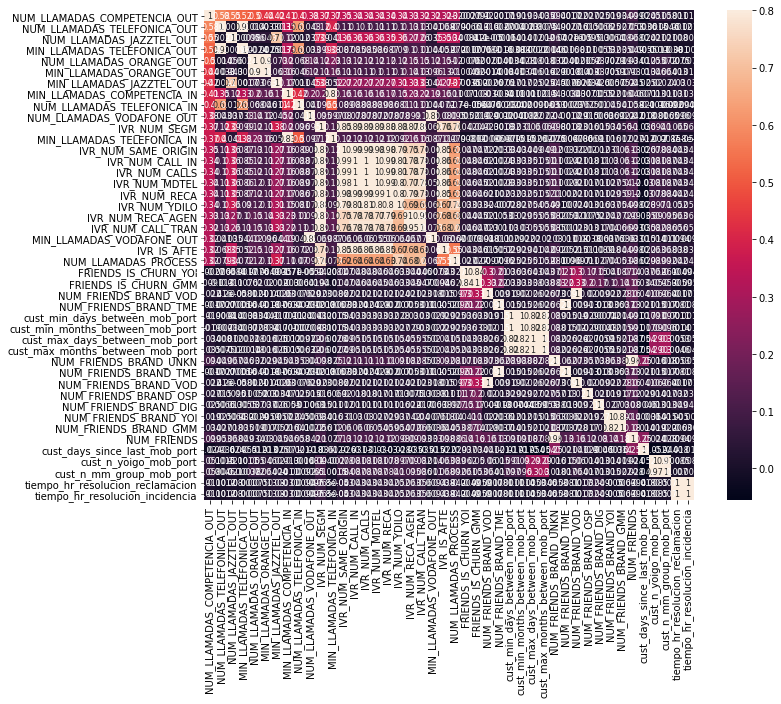

In [136]:
corrmat = tablon_filtrado_ML.corr() #df_corelacion.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot = True, annot_kws = {'size': 8});

In [137]:
# Desde este punto se trabaja con el tablón con todos los registros
# df.shape

# df_num.isnull().values.any()
df_num.shape

(191059, 863)

# OPCION 4

In [175]:

df_num['Amigos_competencia']=df_num['NUM_FRIENDS_BRAND_UNKN'] + df_num['NUM_FRIENDS_BRAND_TME']  +   df_num['NUM_FRIENDS_BRAND_VOD']+  df_num['NUM_FRIENDS_BRAND_OSP']+  df_num['NUM_FRIENDS_BRAND_DIG']  # +  df_num['NUM_FRIENDS_BRAND_YOI']+  df_num['NUM_FRIENDS_BRAND_GMM']
    
df_num['Amigos_competencia'].unique()
                                     


array([ 9, 10,  6,  1,  0,  2,  3,  4,  5,  7,  8])

In [178]:
X=df_num[
    [
        'Amigos_competencia','MIN_LLAMADAS_COMPETENCIA_OUT',
 'NUM_LLAMADAS_COMPETENCIA_OUT', 
 'NUM_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_COMPETENCIA_IN',
 'NUM_LLAMADAS_TELEFONICA_IN',
 'NUM_LLAMADAS_VODAFONE_OUT',
#  'IVR_NUM_SEGM',
 'MIN_LLAMADAS_TELEFONICA_IN',
#  'IVR_NUM_SAME_ORIGIN',
 #'IVR_NUM_CALL_IN',
#  'IVR_NUM_CALLS',
#  'IVR_NUM_MDTEL',
#  'IVR_NUM_RECA',
#  'IVR_NUM_YDILO',
#  'IVR_NUM_RECA_AGEN',
#  'IVR_NUM_CALL_TRAN',
 'MIN_LLAMADAS_VODAFONE_OUT',
 #'IVR_IS_AFTE',
# 'NUM_LLAMADAS_PROCESS',
 'FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_GMM',
 'cust_min_days_between_mob_port',
 'cust_min_months_between_mob_port',
 'cust_max_days_between_mob_port',
 'cust_max_months_between_mob_port',
        
        # sumar numero de amigos en la competencia
#  'NUM_FRIENDS_BRAND_UNKN',
#  'NUM_FRIENDS_BRAND_TME',
#  'NUM_FRIENDS_BRAND_VOD',
#  'NUM_FRIENDS_BRAND_OSP',
#  'NUM_FRIENDS_BRAND_DIG',
#  'NUM_FRIENDS_BRAND_YOI',
#  'NUM_FRIENDS_BRAND_GMM',
        # Fin de sumar numero de amigos en la competencia
        
#  'NUM_FRIENDS',
 'cust_days_since_last_mob_port',
 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port',
 'tiempo_hr_resolucion_reclamacion',
 'tiempo_hr_resolucion_incidencia']]

Y=df[['fuga_real']].astype(str)


# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=5000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)


np.unique(Y_train) # valores target deben de ser tipo caracter

import graphviz 
from sklearn import tree


dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  proportion = True,
                         special_characters=True)




Total de registros en el DF original: 191059
Porcentaje en  train respecto al original: 0.7999989532029373
Porcentaje en  test respecto al original: 0.20000104679706268


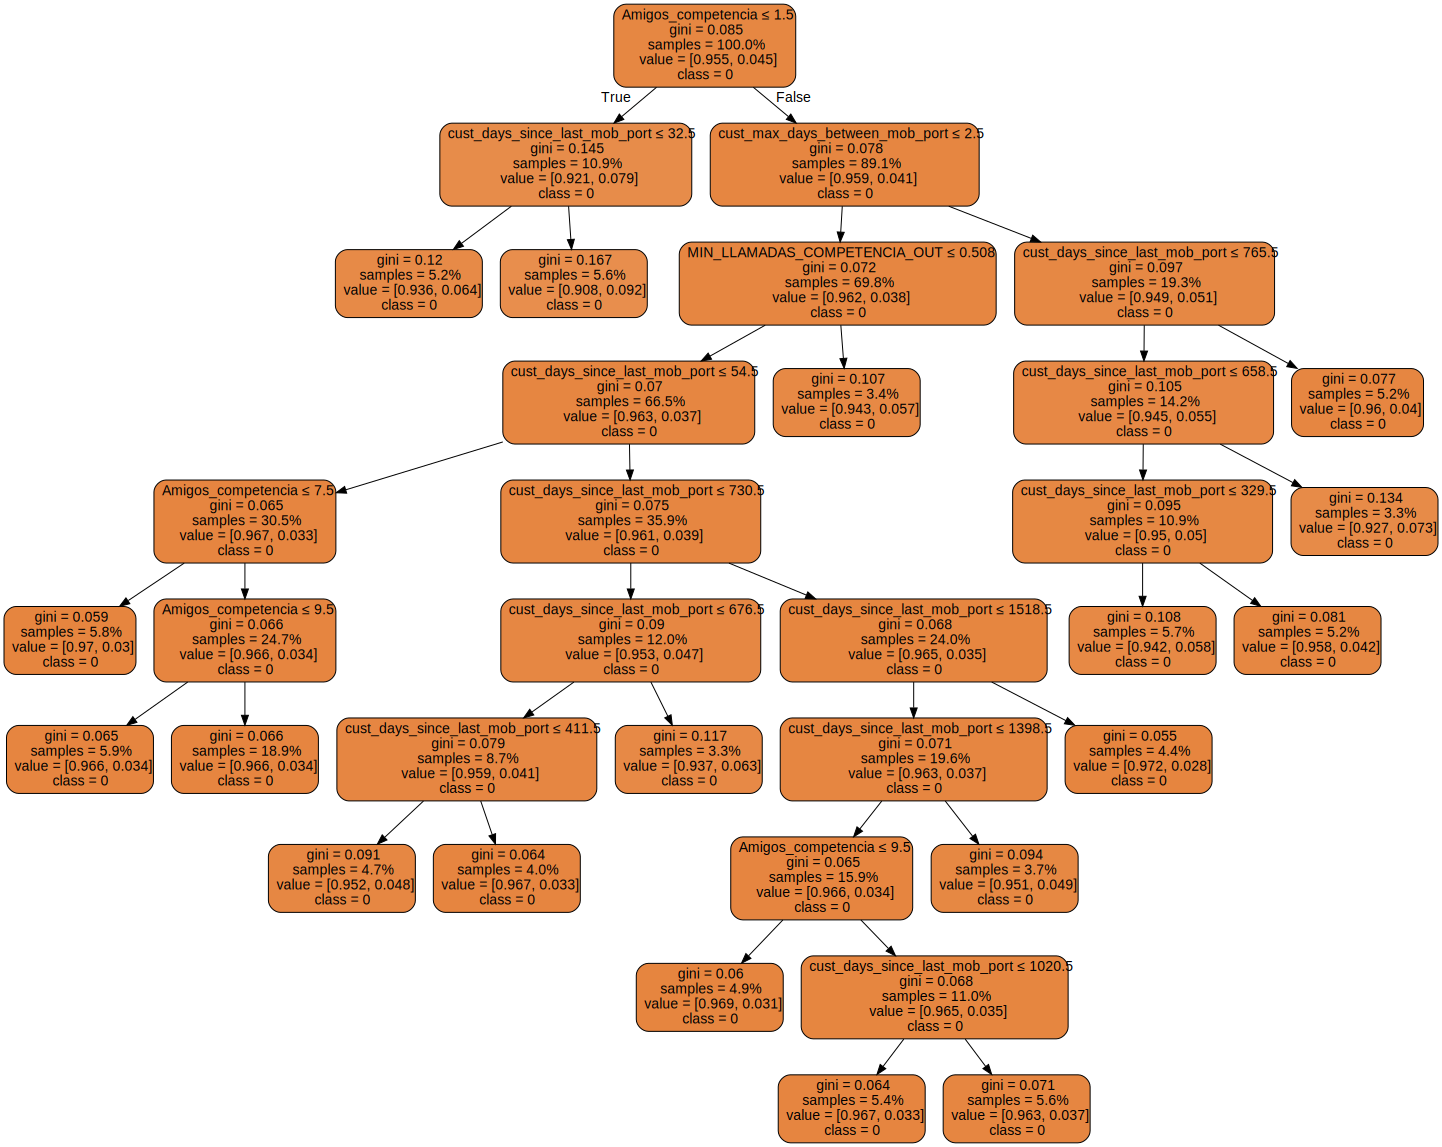

In [179]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

In [ ]:
@@@@@@ stop 

In [ ]:
X=df_num[[
    'IS_ACCO_BUND_LONGER_THAN_1_YEAR',
'NUM_LLAMADAS_COMPETENCIA_OUT',
 'MIN_LLAMADAS_COMPETENCIA_OUT',
 'NUM_LLAMADAS_TELEFONICA_OUT',
 'MIN_LLAMADAS_TELEFONICA_OUT',
 'NUM_LLAMADAS_JAZZTEL_OUT',
 'NUM_LLAMADAS_R_CABLE_OUT',
 'NUM_LLAMADAS_VODAFONE_OUT',
 'MIN_LLAMADAS_VODAFONE_OUT',
 'MIN_LLAMADAS_JAZZTEL_OUT',
 'MIN_LLAMADAS_R_CABLE_OUT',
 'NUM_LLAMADAS_TELEFONICA_IN',
 'NUM_LLAMADAS_ORANGE_OUT',
 'MIN_LLAMADAS_ORANGE_OUT',
 'FRIENDS_IS_CHURN_YOI',
#   mirar 'FRIENDS_IS_CHURN_GMM',
 'NUM_FRIENDS_BRAND_VOD',
#  'cust_min_days_between_mob_port',
 'cust_min_months_between_mob_port',
# 'cust_max_days_between_mob_port',
 'cust_max_months_between_mob_port',
 'cust_n_mob_port',
#  mirar 'cust_n_mob_recent_port',
#  'cust_n_mm_group_mob_port',
 'NUM_FRIENDS_BRAND_UNKN',
 'NUM_FRIENDS_BRAND_TME',
 'NUM_FRIENDS_BRAND_VOD',
 'NUM_FRIENDS_BRAND_OSP',
 'NUM_FRIENDS_BRAND_DIG',
 'NUM_FRIENDS_BRAND_YOI',
 'NUM_FRIENDS_BRAND_GMM',
 'NUM_FRIENDS',
# mirar  'cust_days_since_last_mob_port',
#  'cust_months_since_last_fix_port',
 'cust_n_yoigo_mob_port',
 'cust_n_mm_group_mob_port',
 'tiempo_hr_resolucion_reclamacion',
 'tiempo_hr_resolucion_incidencia'

          ]]

Y=df[['fuga_real']].astype(str)

# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Indice de gini para arbol de decisión
# ======================================================
clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=3000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)


np.unique(Y_train) # valores target deben de ser tipo caracter

import graphviz 
from sklearn import tree


dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  proportion = True,
                         special_characters=True)


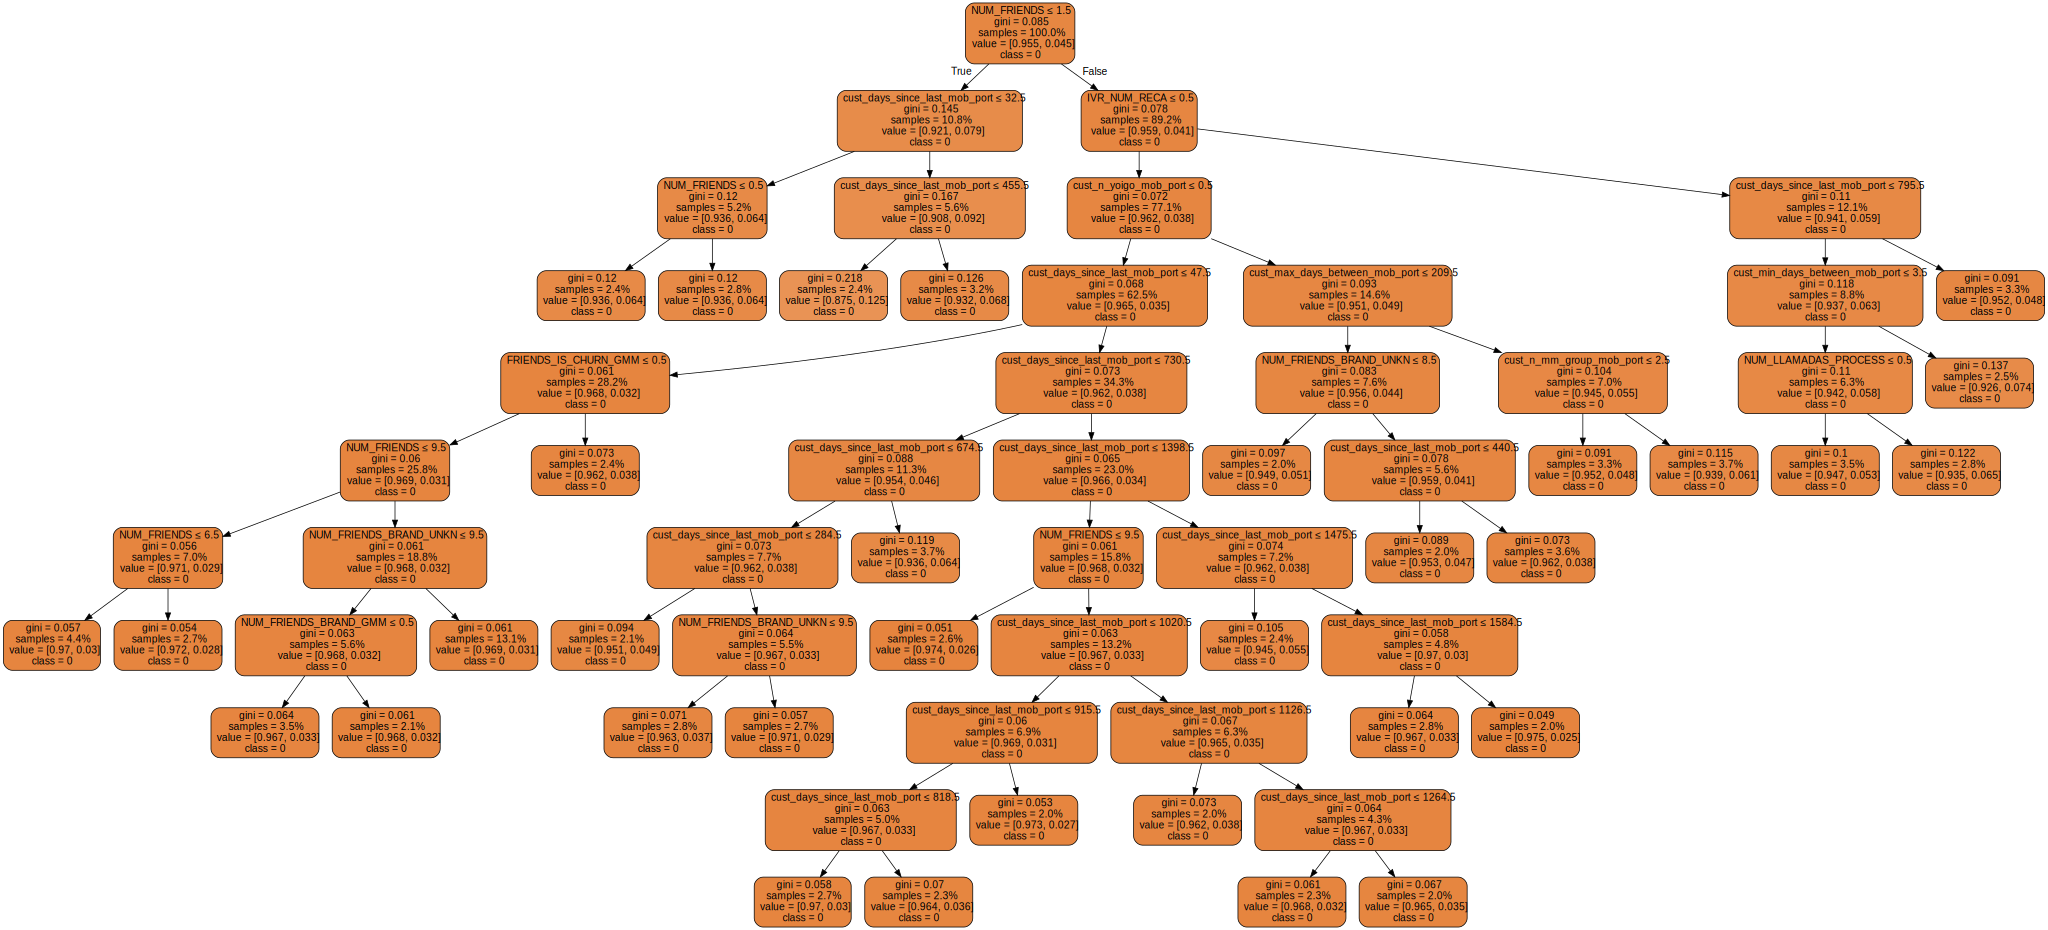

In [140]:
graph = graphviz.Source(dot_data)  
# #Para exportarlo a pdf graph.render("Arbol")
graph

In [ ]:
@@@@@@

In [110]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,  
                         special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"8,8!"')
pydot_graph.write_png('03_SEG_competitors.png')

True

In [43]:
# # REGLA
# # REGLA 1
# # # ======================
# IS_ACCO_BUND_LONGER_THAN_1_YEAR = 0 AND MIN_LLAMADAS_COMPETENCIA_OUT >2  

# # REGLA 2
# # ======================
# IS_ACCO_BUND_LONGER_THAN_1_YEAR = 0 AND MIN_LLAMADAS_COMPETENCIA_OUT < 1  AND  FRIENDS_IS_CHURN_YOI = 1  

# # REGLA 3
# # ======================
# IS_ACCO_BUND_LONGER_THAN_1_YEAR = 0 AND MIN_LLAMADAS_COMPETENCIA_OUT < 1  AND  FRIENDS_IS_CHURN_YOI = 0 and MOSAIC_NUM_COMM_DEPT_ATC_CURR = 1 


In [45]:
conditions = [(df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] > 2 )  | 
              (df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] < 1 ) & (df['FRIENDS_IS_CHURN_YOI'] ==1 ) | 
              (df['IS_ACCO_BUND_LONGER_THAN_1_YEAR'] == 0 ) & (df['MIN_LLAMADAS_COMPETENCIA_OUT'] < 1 ) & (df['FRIENDS_IS_CHURN_YOI'] ==0) & (df['MOSAIC_NUM_COMM_DEPT_ATC_CURR']==1)
             ]
 

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_competitors'] = np.select(conditions, values)
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Bundle_Type,Fecha_Predicion,Modelo,Decil,Percentil,Propension,VERSION,fuga_real,ISSUE_CALL,SEGMENTO_competitors
0,2020,6,202006,YOIGO,6343948,2014-10-16,2017-09-07,2,0,0,...,1P,2020-08-01,CHURN,2,19,0.496213,2,0,0.0,0
1,2020,6,202006,YOIGO,4632464,2012-10-11,.,3,1,1,...,1P,2020-08-01,CHURN,2,12,0.531483,2,0,0.0,0
2,2020,6,202006,YOIGO,7472958,2016-08-03,2020-06-30,2,1,2,...,1P,2020-08-01,CHURN,2,15,0.515396,2,0,0.0,0
3,2020,6,202006,YOIGO,4046104,2012-04-09,2013-11-07,2,0,0,...,1P,2020-08-01,CHURN,1,5,0.607300,2,0,0.0,0
4,2020,6,202006,YOIGO,6397669,2014-11-19,.,2,0,0,...,1P,2020-08-01,CHURN,2,15,0.515620,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63619,2020,6,202006,YOIGO,2350268,2010-09-26,2020-03-13,2,0,0,...,1P,2020-08-01,CHURN,2,19,0.498536,2,0,0.0,0
63620,2020,6,202006,YOIGO,409478,2008-02-29,2014-07-10,5,1,1,...,1P,2020-08-01,CHURN,1,6,0.584916,2,0,0.0,0
63621,2020,6,202006,YOIGO,8072680,2017-10-31,2020-01-31,3,1,1,...,1P,2020-08-01,CHURN,1,8,0.560980,2,0,0.0,0
63622,2020,6,202006,YOIGO,7171931,2016-01-08,2020-02-06,2,0,0,...,1P,2020-08-01,CHURN,2,17,0.505576,2,0,0.0,0


In [46]:
 np.unique(df.SEGMENTO_competitors)

array([0, 1])

In [47]:

def verificar(var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

verificar("lineas_bono_pag")

['lineas_BONO_PAGADO', 'LM3_LINEAS_BONO_PAGADO', 'LM2_LINEAS_BONO_PAGADO']

In [48]:
# condiciones issue

In [49]:
conditions = [(df['NUM_LLAMADAS_PROCESS'] >  0 ) & 
              (df['MOSAIC_NUM_COMM_DEPT_ATC_CURR'] <= 1.5 ) ]
 

# valores
values = [1]
               
# aplicaciones
df['SEGMENTO_ISSUE'] = np.select(conditions, values)
df
    

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,Fecha_Predicion,Modelo,Decil,Percentil,Propension,VERSION,fuga_real,ISSUE_CALL,SEGMENTO_competitors,SEGMENTO_ISSUE
0,2020,6,202006,YOIGO,6343948,2014-10-16,2017-09-07,2,0,0,...,2020-08-01,CHURN,2,19,0.496213,2,0,0.0,0,0
1,2020,6,202006,YOIGO,4632464,2012-10-11,.,3,1,1,...,2020-08-01,CHURN,2,12,0.531483,2,0,0.0,0,0
2,2020,6,202006,YOIGO,7472958,2016-08-03,2020-06-30,2,1,2,...,2020-08-01,CHURN,2,15,0.515396,2,0,0.0,0,0
3,2020,6,202006,YOIGO,4046104,2012-04-09,2013-11-07,2,0,0,...,2020-08-01,CHURN,1,5,0.607300,2,0,0.0,0,0
4,2020,6,202006,YOIGO,6397669,2014-11-19,.,2,0,0,...,2020-08-01,CHURN,2,15,0.515620,2,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63619,2020,6,202006,YOIGO,2350268,2010-09-26,2020-03-13,2,0,0,...,2020-08-01,CHURN,2,19,0.498536,2,0,0.0,0,0
63620,2020,6,202006,YOIGO,409478,2008-02-29,2014-07-10,5,1,1,...,2020-08-01,CHURN,1,6,0.584916,2,0,0.0,0,0
63621,2020,6,202006,YOIGO,8072680,2017-10-31,2020-01-31,3,1,1,...,2020-08-01,CHURN,1,8,0.560980,2,0,0.0,0,0
63622,2020,6,202006,YOIGO,7171931,2016-01-08,2020-02-06,2,0,0,...,2020-08-01,CHURN,2,17,0.505576,2,0,0.0,0,0


#### Se sube las reglas a BQ

In [53]:
conexion_bq.upload_table_bq_gcs(df,
                    'bi-data-science-pilots.DESARROLLO.00segment_cortes', 
                    bucket_gcs = 'nbamasmovil',
                    archivo_gcs = 'a.csv',
                    archivo_local_tmp = 'a.csv',
                    sobreescribo = True,
                    elimino_fichero_gcs = True)



Starting job ceb68c2f-0796-4dc4-ad12-e3e2fede10da
Job finished.
Errors
None
Loaded 191059 rows.


In [54]:

conexion_bq.check_if_table_exists('bi-data-science-pilots.DESARROLLO.00segment_cortes')


True